In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib_venn import venn2
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.compose import ColumnTransformer
import numpy as np
from catboost import CatBoostClassifier, Pool
import ast

In [3]:
#загружаем трэйн
train_df = pd.read_parquet('data\\train_df.parquet')

In [4]:

#дропаем лишние столбцы (если они есть)
#columns_to_drop = ['median_length',  'average_common_categories', 'average_categories']
#df_orders_flat = df_orders_flat.drop(columns=columns_to_drop)

In [5]:
#загружаем валидацию
val_df = pd.read_parquet('data\\val_df.parquet')

In [6]:
def preprocess_dataframe(df):    
    df = df.drop(columns=['user_id'])
    df['target'] = df['target'].map({'male': 0, 'female': 1})
    return df

In [7]:
train_df_proc = preprocess_dataframe(train_df)
train_df_proc

,target,length_mean,order_site-id_count,order_site-id_unique,id_count,id_count_unique,count_sum,session-duration_mean,pages-count_mean,visit_site-id_count,visit_site-id_unique,visit_site-id_mean_male,visit_site-id_mean_female
0,1,3.0,3.0,2.0,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.000000
1,1,11.0,0.0,0.0,0.0,0.0,0.0,56.000000,1.500000,2.0,1.0,0.000000,0.000000
2,0,16.0,2.0,2.0,1.0,1.0,1.0,195.928571,4.571429,14.0,3.0,5.239629,3.303693
3,0,27.0,9.0,4.0,4.0,4.0,4.0,267.764706,3.176471,17.0,6.0,3.041649,1.933425
4,1,35.0,6.0,3.0,5.0,5.0,5.0,279.391304,5.391304,23.0,5.0,6.098808,4.532126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119546,0,11.0,5.0,2.0,3.0,3.0,3.0,2.500000,1.500000,2.0,2.0,0.126230,0.070654
119547,0,13.0,3.0,2.0,1.0,1.0,1.0,0.000000,1.000000,1.0,1.0,0.000000,0.000000
119548,1,24.0,17.0,1.0,17.0,12.0,20.0,106.600000,2.428571,35.0,8.0,3.345009,2.570047
119549,1,8.0,1.0,1.0,1.0,1.0,0.0,101.000000,2.250000,4.0,2.0,0.268538,0.621570


In [8]:
val_df_proc = preprocess_dataframe(val_df)
val_df_proc

,target,length_mean,order_site-id_count,order_site-id_unique,id_count,id_count_unique,count_sum,session-duration_mean,pages-count_mean,visit_site-id_count,visit_site-id_unique,visit_site-id_mean_male,visit_site-id_mean_female
0,1,8.0,1.0,1.0,1.0,1.0,0.0,95.833333,1.583333,12.0,2.0,0.298376,0.690634
1,0,16.0,16.0,4.0,14.0,14.0,16.0,621.000000,4.000000,3.0,3.0,2.078258,1.449996
2,1,50.0,38.0,5.0,38.0,35.0,67.0,179.884615,4.365385,52.0,15.0,0.802134,0.860341
3,1,34.0,52.0,3.0,52.0,46.0,52.0,105.314286,2.657143,35.0,9.0,0.368308,0.971747
4,1,12.0,0.0,0.0,0.0,0.0,0.0,296.000000,18.333333,3.0,2.0,0.378047,0.902735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27442,1,22.0,9.0,6.0,7.0,6.0,9.0,0.000000,1.000000,2.0,1.0,0.000000,0.000000
27443,0,7.0,3.0,1.0,0.0,0.0,0.0,15.333333,1.333333,3.0,2.0,0.491161,0.373947
27444,1,23.0,2.0,1.0,2.0,2.0,2.0,89.307692,1.846154,13.0,5.0,0.545640,0.870649
27445,0,27.0,3.0,2.0,0.0,0.0,0.0,99.818182,2.272727,22.0,11.0,1.273613,1.450829


In [9]:
# Разделение данных на train и test

X_train = train_df_proc.drop(columns=['target'])
y_train = train_df_proc['target']

X_test = val_df_proc.drop(columns=['target'])
y_test = val_df_proc['target']

[0]	test-error:0.38405	train-error:0.37986
[1]	test-error:0.37031	train-error:0.36607
[2]	test-error:0.36397	train-error:0.35982
[3]	test-error:0.36113	train-error:0.35750
[4]	test-error:0.35720	train-error:0.35406
[5]	test-error:0.35774	train-error:0.35085
[6]	test-error:0.35702	train-error:0.34932
[7]	test-error:0.35388	train-error:0.34564
[8]	test-error:0.35228	train-error:0.34415


C:\Users\Yury\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[9]	test-error:0.34743	train-error:0.33879
[10]	test-error:0.34452	train-error:0.33636
[11]	test-error:0.34179	train-error:0.33171
[12]	test-error:0.34226	train-error:0.33171
[13]	test-error:0.33916	train-error:0.32681
[14]	test-error:0.33854	train-error:0.32635
[15]	test-error:0.33825	train-error:0.32674
[16]	test-error:0.33494	train-error:0.32295
[17]	test-error:0.33319	train-error:0.32068
[18]	test-error:0.33421	train-error:0.32072
[19]	test-error:0.33129	train-error:0.31916
[20]	test-error:0.33035	train-error:0.31854
[21]	test-error:0.32787	train-error:0.31757
[22]	test-error:0.32805	train-error:0.31612
[23]	test-error:0.32597	train-error:0.31530
[24]	test-error:0.32820	train-error:0.31510
[25]	test-error:0.32710	train-error:0.31406
[26]	test-error:0.32576	train-error:0.31316
[27]	test-error:0.32488	train-error:0.31275
[28]	test-error:0.32503	train-error:0.31262
[29]	test-error:0.32393	train-error:0.31204
[30]	test-error:0.32492	train-error:0.31137
[31]	test-error:0.32251	train-err

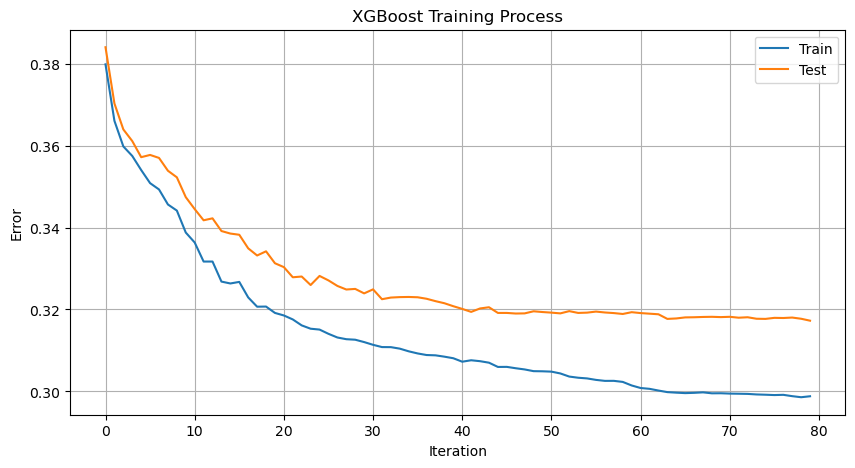

In [10]:
# Создание DMatrix для XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров
param = {
    'max_depth': 3,  # глубина деревьев
    'eta': 0.3,  # шаг обучения
    'objective': 'binary:logistic',  # тип задачи
    'eval_metric': 'error'  # метрика оценки
}


# Обучение модели
num_round = 80 #эпохи
evals = [(dtest, 'test'), (dtrain, 'train')]
evals_result = {}
bst = xgb.train(param, dtrain, num_round, evals, early_stopping_rounds=10, evals_result=evals_result)

# Предсказание на тестовом наборе данных
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Вычисление точности
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

plt.figure(figsize=(10,5))
plt.plot(evals_result['train']['error'], label='Train')
plt.plot(evals_result['test']['error'], label='Test')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('XGBoost Training Process')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Создание пула данных для CatBoost
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Определение параметров
params = {
    'iterations': 190,
    'depth': 3,
    'learning_rate':0.3,
    'l2_leaf_reg': 5,
    'loss_function': 'Logloss',
    'eval_metric': 'Accuracy',
    'verbose': 10
}

# Создание и обучение модели
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=test_pool, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6047963	test: 0.5987904	best: 0.5987904 (0)	total: 177ms	remaining: 33.5s
10:	learn: 0.6548837	test: 0.6507451	best: 0.6507451 (10)	total: 229ms	remaining: 3.72s
20:	learn: 0.6705841	test: 0.6634969	best: 0.6634969 (20)	total: 279ms	remaining: 2.24s
30:	learn: 0.6779784	test: 0.6711480	best: 0.6711480 (30)	total: 333ms	remaining: 1.71s
40:	learn: 0.6867027	test: 0.6780705	best: 0.6780705 (40)	total: 389ms	remaining: 1.41s
50:	learn: 0.6901741	test: 0.6794914	best: 0.6794914 (49)	total: 444ms	remaining: 1.21s
60:	learn: 0.6919808	test: 0.6813495	best: 0.6814952 (56)	total: 500ms	remaining: 1.06s
70:	learn: 0.6933945	test: 0.6821146	best: 0.6822968 (65)	total: 553ms	remaining: 927ms
80:	learn: 0.6942811	test: 0.6833534	best: 0.6836813 (77)	total: 609ms	remaining: 820ms
90:	learn: 0.6951761	test: 0.6841549	best: 0.6841549 (90)	total: 661ms	remaining: 719ms
100:	learn: 0.6968239	test: 0.6837177	best: 0.6841549 (90)	total: 713ms	remaining: 628ms
110:	learn: 0.6976353	test: 0.683